In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Netural Network Solution: Shrawani Singh

#### PART A - DOMAIN: Electronics and Telecommunication

In [54]:
#Importing variou libraries
import numpy as np       # Library for number operations
import pandas as pd      # Library for data operations
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


##### 1. Data import and Understanding

A. Read the ‘Signals.csv’ as DataFrame and import required libraries. 

In [56]:
# read csv file with ";" as seprators
signal_df=pd.read_csv("/content/drive/MyDrive/NN Project Data - Signal.csv",sep=",") 

In [ ]:
signal_df.head(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
# Shape and size of Data

print("Shape:", signal_df.shape)
print("\nColumns:", signal_df.shape[0])
print("\nRows:",signal_df.shape[1])
print("\nSize:",signal_df.size)

Shape: (1599, 12)

Columns: 1599

Rows: 12

Size: 19188


In [ ]:
signal_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


B. Check for missing values and print percentage for each attribute. 

In [ ]:
# Null value detection
signal_df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [ ]:
# Checking missing percentage of each col
percent_missing = signal_df.isnull().sum() * 100 / len(signal_df)
missing_value_df = pd.DataFrame({'column_name': signal_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
Parameter 1,Parameter 1,0.0
Parameter 2,Parameter 2,0.0
Parameter 3,Parameter 3,0.0
Parameter 4,Parameter 4,0.0
Parameter 5,Parameter 5,0.0
Parameter 6,Parameter 6,0.0
Parameter 7,Parameter 7,0.0
Parameter 8,Parameter 8,0.0
Parameter 9,Parameter 9,0.0
Parameter 10,Parameter 10,0.0


C. Check for presence of duplicate records in the dataset and impute with appropriate method

In [ ]:
print("Is there any dublicate value: ",signal_df.duplicated().any())
## Removing the dublicate value
print("No. of duplicate records:", signal_df.groupby(
    signal_df.columns.tolist(), as_index=False).size().count())

#Removing the dublicate Records
df = signal_df.drop_duplicates(keep=False, inplace=False)
print("Any duplicate records after cleansing:", df.duplicated().any())


Is there any dublicate value:  True
No. of duplicate records: Parameter 1        1359
Parameter 2        1359
Parameter 3        1359
Parameter 4        1359
Parameter 5        1359
Parameter 6        1359
Parameter 7        1359
Parameter 8        1359
Parameter 9        1359
Parameter 10       1359
Parameter 11       1359
Signal_Strength    1359
size               1359
dtype: int64
Any duplicate records after cleansing: False


D. Visualise distribution of the target variable.

In [ ]:
df['Signal_Strength'].value_counts()

5    480
6    442
7    138
4     53
8     16
3     10
Name: Signal_Strength, dtype: int64

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


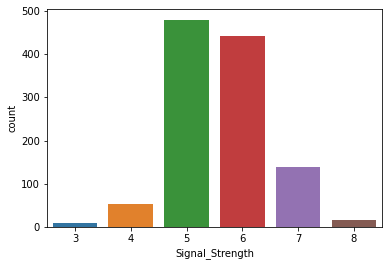

In [ ]:
# Distibution of the column 'Signal_Strength'
sns.countplot(df['Signal_Strength'])
plt.show()


In [ ]:
"""
We can see in the above chart that signal 5 and 6's counts are more closer than any other signal strength value
"""

"\nWe can see in the above chart that signal 5 and 6's counts are more closer than any other signal strength value\n"

E. Share insights from the initial data analysis (at least 2). 

In [ ]:
"""
There are 1599 rows and 12 columns in data
There are 1599 rows and 12 columns
All the parameters are floating point and the signal strength is an integer.
Apart from Signal Strength rest all features are floating point
There are no null values in the data
class 5.0 in 'Signal_Strength' has the highest count.
"""

"\nThere are 1599 rows and 12 columns in data\nThere are 1599 rows and 12 columns\nAll the parameters are floating point and the signal strength is an integer.\nApart from Signal Strength rest all features are floating point\nThere are no null values in the data\nclass 5.0 in 'Signal_Strength' has the highest count.\n"

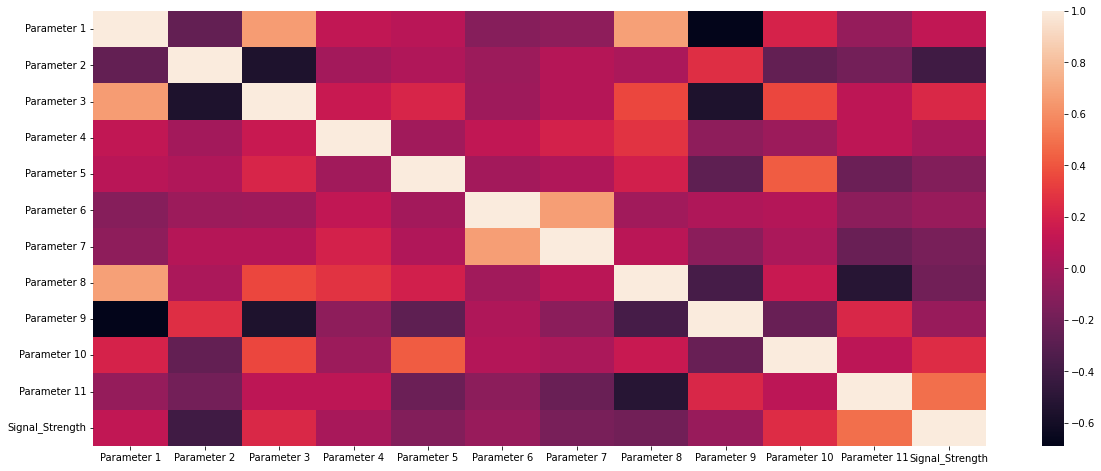

In [ ]:
plt.subplots(figsize=(20, 8))
sns.heatmap(df.corr())
plt.show()


In [ ]:
"""
1.Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters 2.Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9. 3.Parameter 4 is has very low correlation with other Parameters.
"""

'\n1.Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters 2.Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9. 3.Parameter 4 is has very low correlation with other Parameters.\n'

### 2. Data preprocessing 

A. Split the data into X & Y

In [ ]:
# Feature Importance
# Independent variables
X = df.drop('Signal_Strength', axis=1)

# Target variable
Y = df['Signal_Strength']


B. Split the data into train & test with 70:30 proportion.

In [ ]:

# splitting to create test data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(
    X, Y, train_size=0.7, random_state=12)


C. Print shape of all the 4 variables and verify if train and test data is in sync

In [ ]:
print("Shape of X_Train:", X_Train.shape)
print("Shape of X_Test:", X_Test.shape)
print("Shape of Y_Train:", Y_Train.shape)
print("Shape of Y_Test:", Y_Test.shape)


Shape of X_Train: (797, 11)
Shape of X_Test: (342, 11)
Shape of Y_Train: (797,)
Shape of Y_Test: (342,)


D. Normalise the train and test data with appropriate method. 

In [ ]:
# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_Train)

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_Test)


In [ ]:
# Confirming Matrix size
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)


(797, 11)
(342, 11)
(797,)
(342,)


E. Transform Labels into format acceptable by Neural Network

In [ ]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


### 3. Model Training & Evaluation using Neural Network

In [ ]:
# importing packages
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers


A. Design a Neural Network to train a classifier.

In [ ]:
# Independent variables
X=df.drop('Signal_Strength',axis=1)  

# Target variable
Y = df['Signal_Strength']

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [ ]:
# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_Train)

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_Test)


In [ ]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',
                       input_dim=X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor.add(
    Dense(64, kernel_initializer='normal', activation='relu'))

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))  # except softmax
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

# Compile the network :
NN_model_Regressor.compile(loss='mean_absolute_error',
                           optimizer='adam', metrics=['accuracy'])
NN_model_Regressor.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               1536      
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 1)               

B. Train the classifier using previously designed Architecture 

In [ ]:
EPOCH=400
Network_Regressor=NN_model_Regressor.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
4/4 [==============================] - 1s 91ms/step - loss: 5.6033 - accuracy: 0.0000e+00 - val_loss: 5.6065 - val_accuracy: 0.0000e+00
Epoch 2/400
4/4 [==============================] - 0s 14ms/step - loss: 5.5949 - accuracy: 0.0000e+00 - val_loss: 5.5963 - val_accuracy: 0.0000e+00
Epoch 3/400
4/4 [==============================] - 0s 20ms/step - loss: 5.5830 - accuracy: 0.0000e+00 - val_loss: 5.5811 - val_accuracy: 0.0000e+00
Epoch 4/400
4/4 [==============================] - 0s 21ms/step - loss: 5.5644 - accuracy: 0.0000e+00 - val_loss: 5.5562 - val_accuracy: 0.0000e+00
Epoch 5/400
4/4 [==============================] - 0s 27ms/step - loss: 5.5331 - accuracy: 0.0000e+00 - val_loss: 5.5138 - val_accuracy: 0.0000e+00
Epoch 6/400
4/4 [==============================] - 0s 27ms/step - loss: 5.4800 - accuracy: 0.0000e+00 - val_loss: 5.4401 - val_accuracy: 0.0000e+00
Epoch 7/400
4/4 [==============================] - 0s 26ms/step - loss: 5.3873 - accuracy: 0.0000e+00 - val_loss

C. Plot 2 separate visuals.

i. Training Loss and Validation Loss

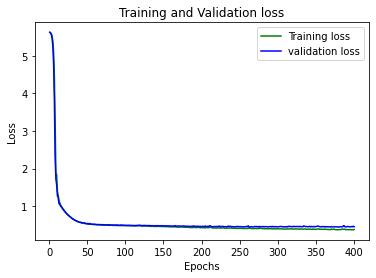

In [ ]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1, EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


ii. Training Accuracy and Validation Accuracy

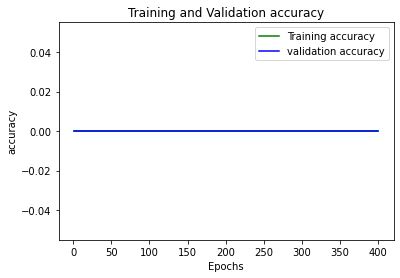

In [ ]:
Acc_train = Network_Regressor.history['accuracy']
Acc_val = Network_Regressor.history['val_accuracy']
epochs = range(1, EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, Y = make_classification(n_samples=1000, n_features=5, n_informative=2,
                           n_redundant=3, n_repeated=0, n_classes=2,
                           shuffle=True, random_state=2020)


In [ ]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [ ]:
# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_Train)

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_Test)


In [ ]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',
                       input_dim=X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor.add(
    Dense(64, kernel_initializer='normal', activation='relu'))  # sigmoid, tanh

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))  # except softmax
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

# Compile the network :
NN_model_Regressor.compile(loss='mean_absolute_error',
                           optimizer='adam', metrics=['accuracy'])
NN_model_Regressor.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               768       
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_43 (Dense)            (None, 1)               

In [ ]:
EPOCH=400
Network_Regressor=NN_model_Regressor.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
4/4 [==============================] - 1s 70ms/step - loss: 0.5043 - accuracy: 0.4957 - val_loss: 0.4898 - val_accuracy: 0.5100
Epoch 2/400
4/4 [==============================] - 0s 19ms/step - loss: 0.5039 - accuracy: 0.4957 - val_loss: 0.4891 - val_accuracy: 0.5100
Epoch 3/400
4/4 [==============================] - 0s 15ms/step - loss: 0.5031 - accuracy: 0.4957 - val_loss: 0.4878 - val_accuracy: 0.5100
Epoch 4/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5013 - accuracy: 0.4957 - val_loss: 0.4852 - val_accuracy: 0.5100
Epoch 5/400
4/4 [==============================] - 0s 23ms/step - loss: 0.4981 - accuracy: 0.4957 - val_loss: 0.4797 - val_accuracy: 0.5100
Epoch 6/400
4/4 [==============================] - 0s 20ms/step - loss: 0.4913 - accuracy: 0.4957 - val_loss: 0.4695 - val_accuracy: 0.5100
Epoch 7/400
4/4 [==============================] - 0s 20ms/step - loss: 0.4793 - accuracy: 0.4957 - val_loss: 0.4507 - val_accuracy: 0.5100
Epoch 8/400
4/4 [===

E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [

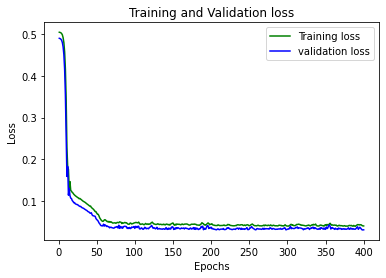

In [ ]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1, EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


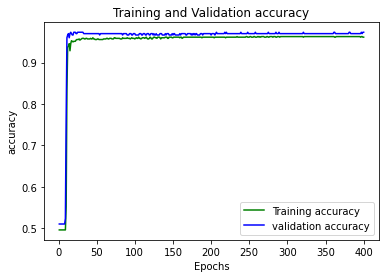

In [ ]:
Acc_train = Network_Regressor.history['accuracy']
Acc_val = Network_Regressor.history['val_accuracy']
epochs = range(1, EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [ ]:
"""
We can see a slight shift towards downward for training loss and validation loss in the above model but however we see a huge significant changnes with resepect to the Training accuracy and validation accuracy
"""

'\nWe can see a slight shift towards downward for training loss and validation loss in the above model but however we see a huge significant changnes with resepect to the Training accuracy and validation accuracy\n'

### PART B - Autonomous Vehicles

In [ ]:
# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None


### 1. Data Import and Exploration 

A. Read the .h5 file and assign to a variable

In [ ]:
import h5py

# Open the file as readonly
h5f = h5py.File(
    'Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')


B. Print all the keys from the .h5 file.

In [ ]:
h5f.keys()


<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

C. Split the data into X_train, X_test, Y_train, Y_test

In [ ]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


### 2. Data Visualisation and preprocessing

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [ ]:
X_train[:1]


array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [ ]:
y_train[:1]


array([2], dtype=uint8)

In [ ]:
X_test[:1]


array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [ ]:
y_test[:1]


array([1], dtype=uint8)

B. Visualise first 10 images in train data and print its corresponding labels.

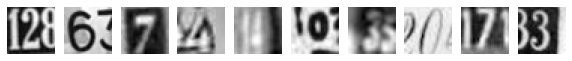

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))


C. Reshape all the images with appropriate shape update the data in same variable.

In [ ]:
X_train.shape


(42000, 32, 32)

In [ ]:
y_train.shape


(42000,)

In [ ]:
## Reshaping all the variables
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)


D. Normalise the images i.e. Normalise the pixel values

In [ ]:
# We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)


Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


E. Transform Labels into format acceptable by Neural Network

In [ ]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


F. Print total Number of classes in the Dataset

In [ ]:
# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


### 3. Model Training & Evaluation using Neural Network

A. Design a Neural Network to train a classifier. 

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


def nn_model():
    # create model
    model = Sequential()
    model.add(Flatten())
    # Multiple Dense units with Relu activation
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [ ]:
# build the model
model = nn_model()


In [ ]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)

### Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])


B. Train the classifier using previously designed Architecture (Use best suitable parameters)

In [ ]:
# Fitting the model
training_history = model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=100, batch_size=300, verbose=2)


Epoch 1/100
140/140 - 3s - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0955 - 3s/epoch - 23ms/step
Epoch 2/100
140/140 - 2s - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3028 - val_accuracy: 0.0955 - 2s/epoch - 11ms/step
Epoch 3/100
140/140 - 2s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.0955 - 2s/epoch - 11ms/step
Epoch 4/100
140/140 - 2s - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.0955 - 2s/epoch - 11ms/step
Epoch 5/100
140/140 - 2s - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955 - 2s/epoch - 12ms/step
Epoch 6/100
140/140 - 2s - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0955 - 2s/epoch - 14ms/step
Epoch 7/100
140/140 - 2s - loss: 2.3017 - accuracy: 0.1072 - val_loss: 2.2959 - val_accuracy: 0.1274 - 2s/epoch - 11ms/step
Epoch 8/100
140/140 - 2s - loss: 2.2123 - accuracy: 0.1532 - val_loss: 2.1392 - val_accuracy: 0.1722 - 2s/epoch - 15ms/step
Epoch 9/

C. Evaluate performance of the model with appropriate metrics. 

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])


Loss: 1.410311222076416
Accuracy: 0.49272221326828003


D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your 
observations on the same.

Text(0.5, 1.0, 'Training and validation loss')

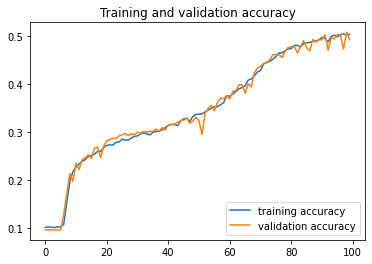

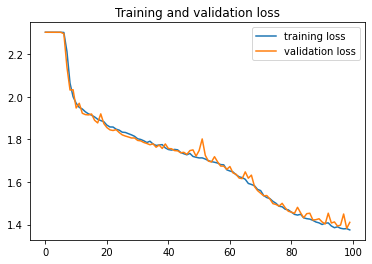

In [ ]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs = range(len(accuracy))  # Get number of epochs

plt.plot(epochs, accuracy, label='training accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')


Observation:
We see the total 10 classes in the dataset which represent digits from 0-9.

we have performed a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy.

we can observe that after certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

This is why, with this amount of accuracy we are able to distinguish between the different digits in this dataset.
